In [124]:
import numpy as np
import matplotlib.pyplot as plt

# 한글 깨짐 방지 
plt.rc('font', family='Malgun Gothic')
cnt, PNG, UNDERBAR = 0, ' .png', '_'
CHART_NAME = 'barChartExam'
filename = './../data/주요발생국가주간동향(4월2째주).csv'

In [125]:
import pandas as pd

data = pd.read_csv(filename, index_col='국가')

print(data.columns)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


In [126]:
chartdata = data['4월06일']
print(chartdata)
print('type(chardata)')
type(chartdata)

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64
type(chardata)


pandas.core.series.Series

In [127]:
#plt.bar() 메소드를 사용한 막대 그래프

def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure() # 새로운 그래프 창 생성
    plt.bar(x, y, color = color, alpha = 0.7) # 막대 그래프 그리기 (alpha는 투명도)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #plt.gird(True)

    # y축 눈금 간격 설정 (50,000 단위)
    YTICKS_INTERVAL = 50000

    # y축의 최대 한계치 계산 (데이터 최대값보다 큰 눈금까지 표시하기 위함)
    maxlim = (int(y.max() / YTICKS_INTERVAL) +1) * YTICKS_INTERVAL
    print(maxlim)

    # y축 눈금 값 배열 생성
    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    # y축 눈금에 천 단위 콤마(,) 서식 적용
    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 각 항목이 전체에서 차지하는 비율(%) 계산
    ratio = 100 * y /  y.sum()
    print(ratio)
    print('-'*40)

    plt.rc('font', size = 6)

    # 막대 그래프 위에 건수와 비율을 텍스트로 표시하는 반복문
    for idx in range(y.size):
        value = format(y.iloc[idx], ',') + '건'
        ratioval = '%.1f%%' % (ratio.iloc[idx])
        #그래프 위에 "건수" 표시
        plt.text(x=idx, y=y.iloc[idx] + 1, s=value, horizontalalignment='center')
        # 그래프 중간에 비율 표시
        plt.text(x=idx, y=y.iloc[idx] / 2, s=ratioval, horizontalalignment='center')

    # 평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)
    print('-'*40)

    average = '평균 : %d건' % meanval
    
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size -1, y=meanval + 200, s=average, horizontalalignment='center')

    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')

350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
----------------------------------------
98481.1
----------------------------------------
barChartExam_01 .png파일이 저장되었습니다.


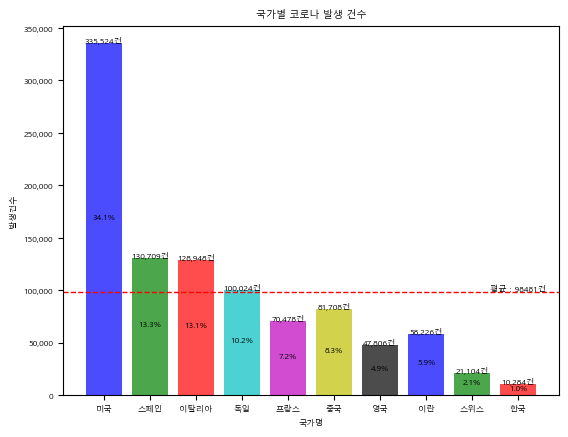

In [128]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

mycolor = colors[0:len(chartdata)]

MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='국가명', ylabel='발생건수', title='국가별 코로나 발생 건수')

In [129]:
def MakeBarChart02(chartdata, rotation, title, ylim=None, stacked = False, yticks_interval = 10000):
    plt.figure()
# 범례에 제목을 넣으려면 plot()메소드의 legend 옵션 사용
    chartdata.plot(kind='bar', rot=rotation, title = title, legend = True, stacked = stacked)

    plt.legend(loc = 'best')

    print('chartdata')
    print(chartdata)

    if stacked == False : 
        maxlim = (int(max(chartdata.max()) / yticks_interval) + 1) * yticks_interval
        print('maxlim : ', maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])

    else: #누적 막대 그래프
        maxlim = (int(max(chartdata.sum(axis=1)) / yticks_interval) + 1) * yticks_interval
        print('maxlim : ', maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])

        # y축의 상하한 값
    if ylim != None :
        plt.ylim(ylim)
    global cnt
    cnt  =  cnt + 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')

In [130]:
data = pd.read_csv(filename, index_col='국가')
print(data.columns)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


In [131]:
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일','4월07일', '4월08일']
data = data.loc[COUNTRY, WHEN]

data

,4월06일,4월07일,4월08일
국가,,,
프랑스,70478,74390,78167
중국,81708,81740,81802
영국,47806,51608,55242
이란,58226,60500,62589


chartdata
     4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
maxlim :  90000
barChartExam_02 .png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

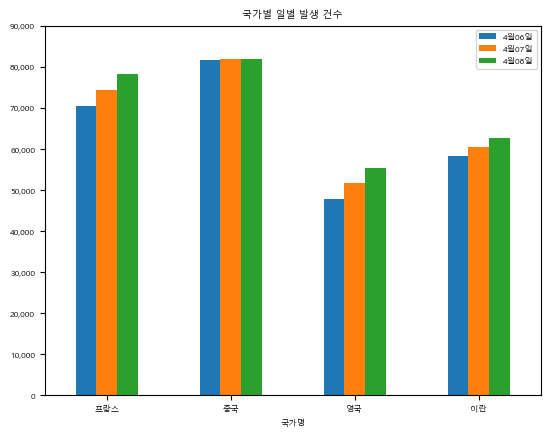

In [132]:
data.index.name = '국가명'
data.columns.nae = '일자'

MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수')

chartdata
국가명      프랑스     중국     영국     이란
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589
maxlim :  90000
barChartExam_03 .png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

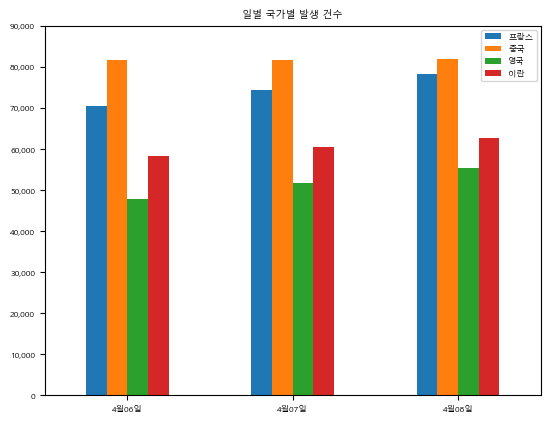

In [133]:
# 전체 프레임을 그래프로 그리기
dataT = data.T
dataT
MakeBarChart02(chartdata= dataT, rotation=0, title='일별 국가별 발생 건수')

chartdata
     4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
maxlim :  250000
barChartExam_04 .png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

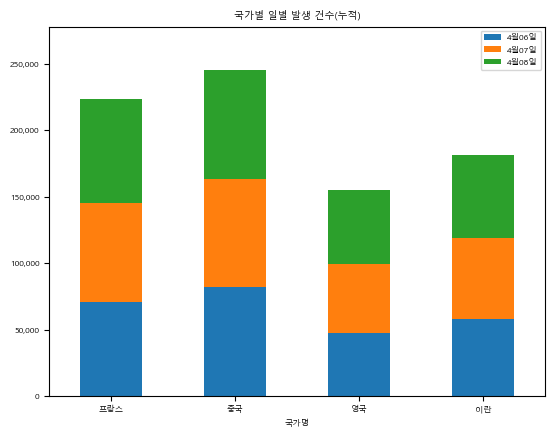

In [134]:
ymax = dataT.sum(axis=1)
ymaxlimit = ymax.max() + 10

MakeBarChart02(chartdata = data, rotation = 0, title = '국가별 일별 발생 건수(누적)', ylim=[0, ymaxlimit], stacked = True, yticks_interval = 50000)

In [135]:
data = pd.read_csv(filename, index_col = '국가')

three = [item for item in data.index if item in ['프랑스', '영국', '중국']]
print(three)
['프랑스', '중국', '영국']

data = data.loc[three]
data

['프랑스', '중국', '영국']


,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991


In [136]:
column_names = data.columns.tolist()

print('column_names')
column_names

column_names


['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일']

In [137]:
chartdata = {}

for row in data.index:
    chartdata[row] = data.loc[row].values

print('chartdata')
chartdata

chartdata


{'프랑스': array([70478, 74390, 78167, 82048, 86334, 90276, 93790]),
 '중국': array([81708, 81740, 81802, 81865, 81907, 81953, 82052]),
 '영국': array([47806, 51608, 55242, 60733, 65077, 73758, 78991])}

In [138]:
def MakeBarChart03(chartdata, column_names):
    labels = list(chartdata.keys())
    data = np.array(list(chartdata.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))
    fig, ax = plt.subplots(figsize = (9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(column_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5, 
                label = colname, color = color)
        xcenters = starts + widths / 2
        r, g, b, _ = color 
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color = text_color)
    ax.legend(ncol=len(column_names), bbox_to_anchor=(0,1),
              loc = 'lower left', fontsize='small')

    global cnt
    cnt = cnt + 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')
        
    return fig, ax
    #end def MakeBarChart03

barChartExam_05 .png파일이 저장되었습니다.


(<Figure size 920x500 with 1 Axes>, <Axes: >)

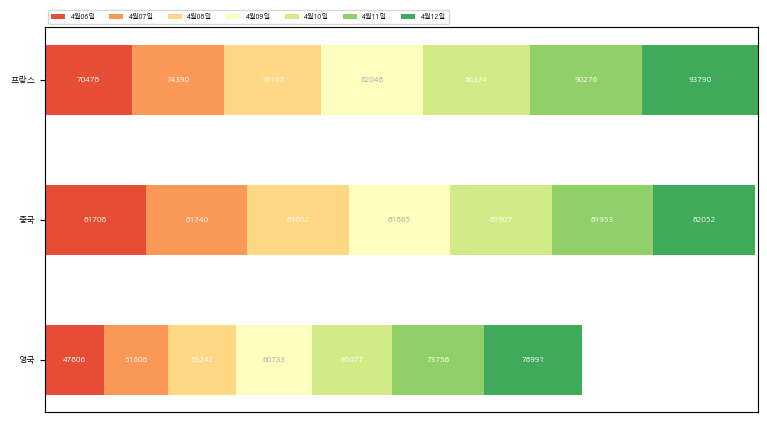

In [139]:
MakeBarChart03(chartdata, column_names)

# 서브 플로팅 사용하기 

In [140]:
def MakeBarChart04(chartdata, suptitle):
    fig, axes = plt.subplots(nrows=2, ncols=1) #2행 1열

    chartdata.plot(kind='bar', ax=axes[0], rot=0, alpha=0.7)

    chartdata.plot(kind='barh', ax=axes[1], color='m', alpha=0.7)
    fig.suptitle(suptitle)

    global cnt
    cnt = cnt + 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')
# end MakeBarChart04

국가         미국
4월06일  335524
4월07일  364723
4월08일  387547
4월09일  424945
4월10일  461437
4월11일  495535
4월12일  524903
<class 'pandas.core.frame.DataFrame'>
barChartExam_06 .png 파일이 저장되었습니다.


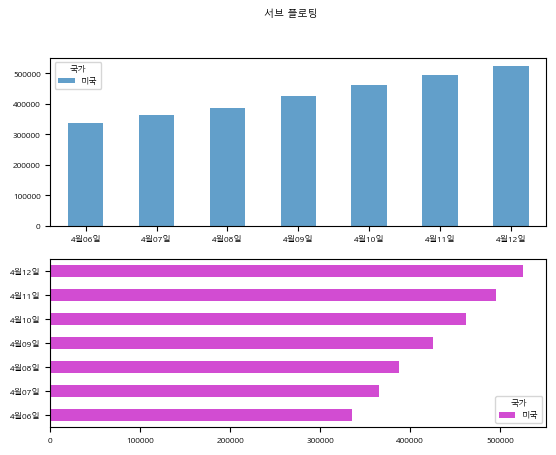

In [141]:
data = pd.read_csv(filename, index_col='국가')

only_usa = [item for item in data.index if item in ['미국']]
data = data.loc[only_usa].T
print(data)

print(type(data))
MakeBarChart04(chartdata=data, suptitle = '서브 플로팅')

# 엑셀처럼 table이 존재하는 bar chart 그리기

In [142]:
data = pd.read_csv(filename, index_col = '국가')
print(data.columns)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


In [143]:
COUNTRY = ['스페인', '프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일','4월08일','4월09일','4월10일']
data = data.loc[COUNTRY, WHEN]

print('data')
data

data


,4월06일,4월07일,4월08일,4월09일,4월10일
국가,,,,,
스페인,130709,135032,140510,146690,152446
프랑스,70478,74390,78167,82048,86334
중국,81708,81740,81802,81865,81907
영국,47806,51608,55242,60733,65077
이란,58226,60500,62589,64586,66220


In [156]:
rows = [x for x in data.index]
print('rows')
rows

rows


['스페인', '프랑스', '중국', '영국', '이란']

In [157]:
columns = [x for x in data.columns]
print('columns')
columns

columns


['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']

In [158]:
print('데이터 최대 값:', max(data.max()))

데이터 최대 값: 152446


In [159]:
n_rows = len(data)  #행 수 

In [160]:
print('n_rows:', n_rows)

n_rows: 5


In [161]:
LEFT_MARGIN = 0.3
index = np.arange(len(columns)) + LEFT_MARGIN
print('ind예시 : ', index)

ind예시 :  [0.3 1.3 2.3 3.3 4.3]


In [162]:
y_offset = np.zeros(len(columns))
print('y_offset:', y_offset)

y_offset: [0. 0. 0. 0. 0.]


data[row]
[130709, 135032, 140510, 146690, 152446]
y_offset
[392127. 405096. 421530. 440070. 457338.]
data[row]
[70478, 74390, 78167, 82048, 86334]
y_offset
[462605. 479486. 499697. 522118. 543672.]
data[row]
[81708, 81740, 81802, 81865, 81907]
y_offset
[544313. 561226. 581499. 603983. 625579.]
data[row]
[47806, 51608, 55242, 60733, 65077]
y_offset
[592119. 612834. 636741. 664716. 690656.]
data[row]
[58226, 60500, 62589, 64586, 66220]
y_offset
[650345. 673334. 699330. 729302. 756876.]
cell_text:  [['58,226', '60,500', '62,589', '64,586', '66,220'], ['47,806', '51,608', '55,242', '60,733', '65,077'], ['81,708', '81,740', '81,802', '81,865', '81,907'], ['70,478', '74,390', '78,167', '82,048', '86,334'], ['130,709', '135,032', '140,510', '146,690', '152,446']]
rows : ['스페인', '프랑스', '중국', '영국', '이란']
columns : ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
800000
SalesChart_08.png파일이 저장되었습니다.


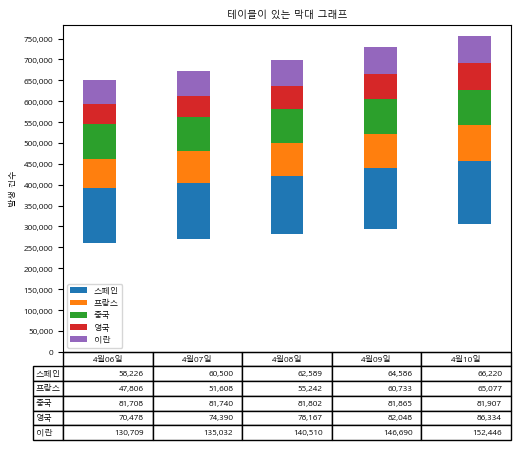

In [167]:
# 표에 들어 가는 텍스트 내용
cell_text = [] 
plt.figure()
for row in data.index:
    print('data[row]')
    chartdata = data.loc[row].tolist()
    print(chartdata)

    #bottom
    bar_width = 0.35
    plt.bar(index, chartdata, bar_width, bottom=y_offset, label=row)

    #y_offset에는 열 단위로 누적된 값이 들어감
    y_offset = y_offset + chartdata
    print('y_offset')
    print(y_offset)

    cell_text.append([format(x, ',') for x in chartdata])



cell_text.reverse()
rows = [rows[idx] for idx in range(len(rows) -1, -1, -1) ]

# Add table at the bottom of the axes
print('cell_text: ', cell_text)

print('rows :', rows)
print('columns :' , columns)

the_table = plt.table(cellText = cell_text, rowLabels=rows, colLabels=columns, loc='bottom')

plt.legend(loc = 'best')
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("발생 건수")

YTICKS_INTERVAL = 50000
maxlim = (int(y_offset.max()/YTICKS_INTERVAL)+1)*YTICKS_INTERVAL
print(maxlim)

values = np.arange(0, maxlim , YTICKS_INTERVAL)

plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.xticks([])
plt.title('테이블이 있는 막대 그래프')

CHART_NAME = "SalesChart"
UNDERBAR = "_"
PNG = ".png"
cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + '파일이 저장되었습니다.')